In [30]:
#导入numpy库，别名np，用于数值计算
import numpy as np

In [31]:
#mnist_reader.py：解析数据包
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [32]:
#读取数据包，其中：X_train为训练图片集, y_train为训练标签集，X_test为测试图片集, y_test为测试标签集
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

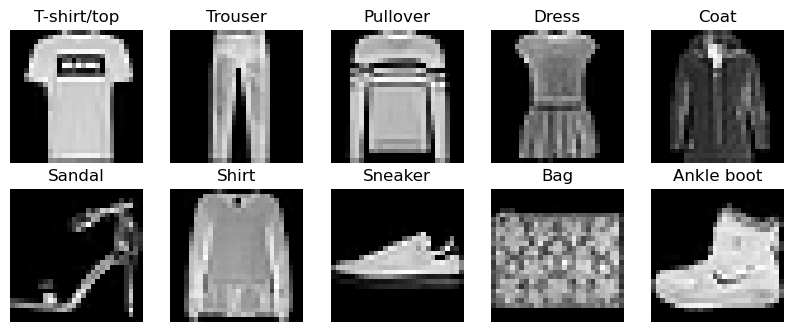

In [33]:
#查看每一个类别的示意图
import matplotlib.pyplot as plt
# 定义类别名称
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 创建一个图像网格来显示每个类别的样本
plt.figure(figsize=(10, 10))
for i in range(10):
    # 在每个类别中找到第一个样本
    idx = np.where(y_train == i)[0][0]
    img = X_train[idx].reshape(28, 28)
    
    plt.subplot(5, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.show()

In [34]:
#将数据集标准化
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pre_data = StandardScaler()
X_train = pre_data.fit_transform(X_train)
X_test  = pre_data.transform(X_test)

In [35]:
#检查读取情况,784为像素值，可知像素值为原始特征
print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [36]:
#scikit-image库 中导入HOG
from skimage.feature import hog

In [37]:
#转换图像为灰度
train_gray_images= X_train.reshape( X_train.shape[0],28,28)
test_gray_images= X_test.reshape( X_test.shape[0],28,28)

In [38]:
# 计算HOG特征并生成以HOG为特征的训练集和测试集
X_train_hog=np.array( [hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), block_norm='L2-Hys') for image in train_gray_images])
X_test_hog=np.array( [hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), block_norm='L2-Hys') for image in test_gray_images])

In [39]:
#将HOG特征标准化
X_train_hog= pre_data.fit_transform(X_train_hog)
X_test_hog= pre_data.fit_transform(X_test_hog)

In [40]:
#检查以HOG为特征的数据集和训练集
print(X_train_hog.shape,y_train.shape,X_test_hog.shape, y_test.shape)

(60000, 144) (60000,) (10000, 144) (10000,)


In [41]:
#从sklearn库中导入svm及准确度，混淆矩阵，热图
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

Accuracy: 0.837


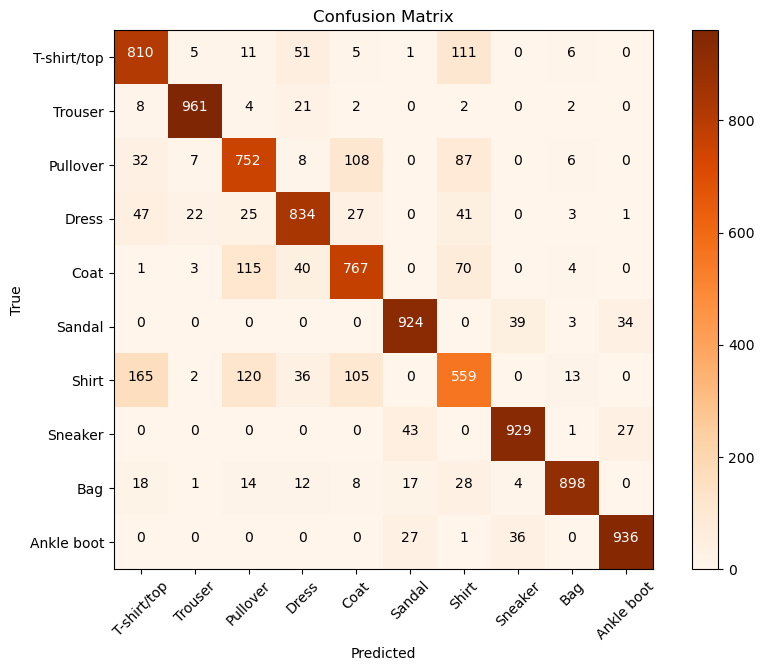

In [13]:
# 初始化SVM分类器：像素值特征，线性核函数
clf = svm.SVC(kernel='linear')

# 使用训练数据拟合分类器
clf.fit(X_train, y_train)

# 使用测试数据进行预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names)

# 在每个单元格中添加数字
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.8052


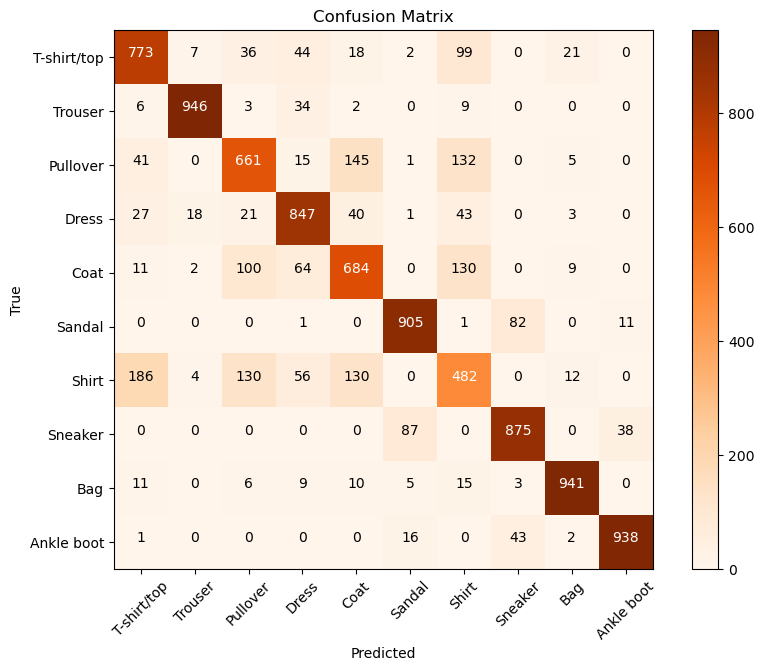

In [14]:
# 初始化SVM分类器：HOG特征，线性核函数
clf = svm.SVC(kernel='linear')

# 使用训练数据拟合分类器
clf.fit(X_train_hog, y_train)

# 使用测试数据进行预测
y_pred = clf.predict(X_test_hog)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names)

# 在每个单元格中添加数字
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.8755


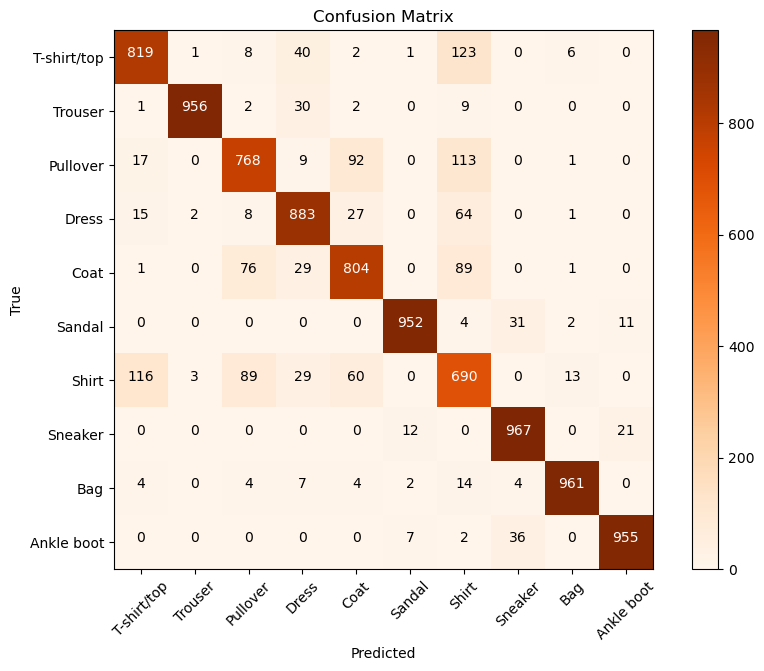

In [15]:
# 初始化SVM分类器：像素值特征，多项式核函数
clf = svm.SVC(kernel='poly')

# 使用训练数据拟合分类器
clf.fit(X_train, y_train)

# 使用测试数据进行预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names)

# 在每个单元格中添加数字
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.8414


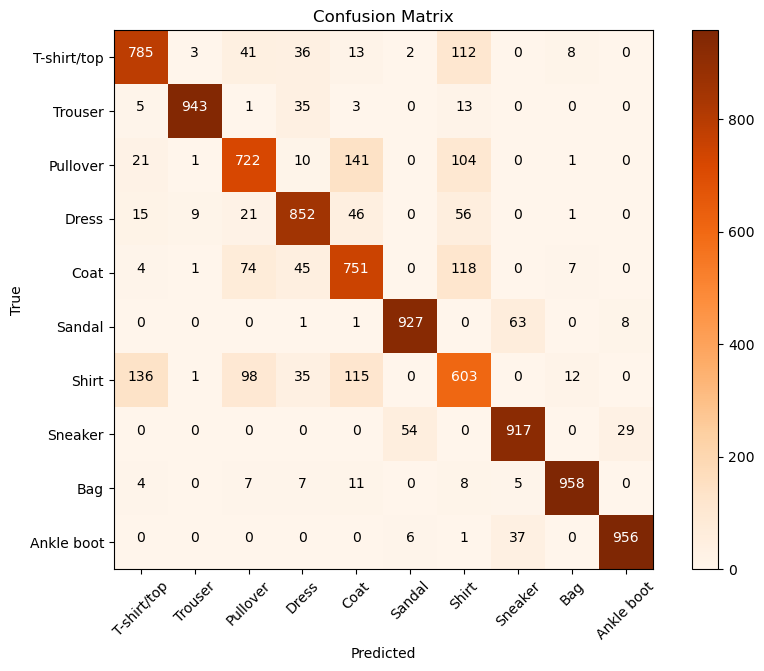

In [16]:
# 初始化SVM分类器：HOG特征，多项式核函数
clf = svm.SVC(kernel='poly')

# 使用训练数据拟合分类器
clf.fit(X_train_hog, y_train)

# 使用测试数据进行预测
y_pred = clf.predict(X_test_hog)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names)

# 在每个单元格中添加数字
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [42]:
#从sklearn中导入神经网络分类模块和网格搜索
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

E:\anaconda\at\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best parameters found:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (300, 400), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
Accuracy: 0.8888


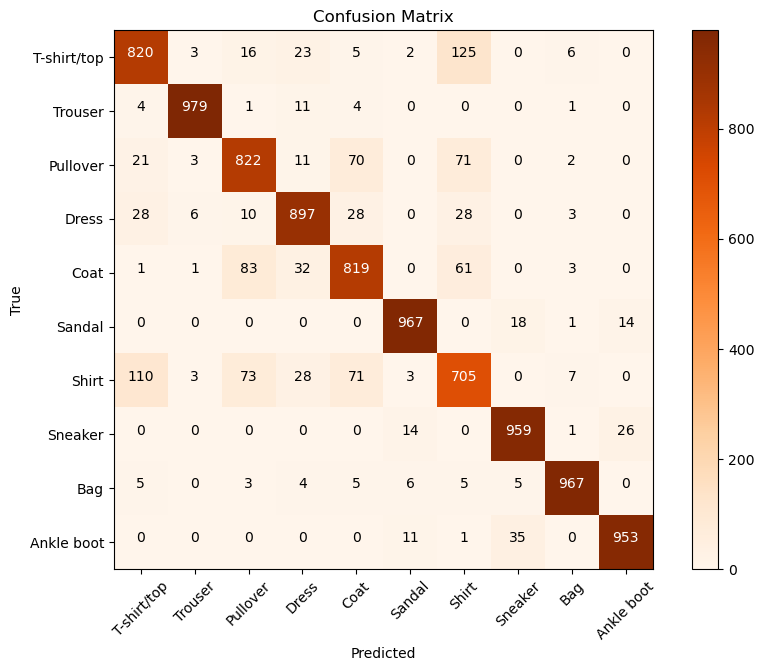

In [43]:
# 定义参数网格
param_grid = {
 'hidden_layer_sizes': [(100,200),(200,100),(300,400),(400,300)],
    'activation': ['identity','relu', 'tanh', 'logistic'],
    'solver': ['lbfgs','relu', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001,0.01,0.1],
    'learning_rate': ['constant','invscaling', 'adaptive']
}
# 初始化MLPClassifier（多层感知器分类器）
mlp = MLPClassifier( max_iter=200, random_state=100)

# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(mlp, param_grid,n_jobs=-1, cv=2, scoring='accuracy',error_score='raise')
grid_search.fit(X_train, y_train)

# 输出最优参数
print("Best parameters found:")
print(grid_search.best_params_)

# 使用最优参数的模型进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names)

# 在每个单元格中添加数字
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()